# T2.1 - Solution
## Authors:
- Leonardo Kaplan 1212509
- Nino Fabrizio Tiriticco Lizardo 1113203

In [87]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# Pacotes usados
import pandas as pd
from github import Github
import time
import os
import base64
import difflib


In [88]:
git = Github("leokaplan",'',per_page=100)
#print(git.get_rate_limit())
#print(time.localtime(git.rate_limiting_resettime))
#print(git.per_page)
commits_pag = git.get_user('facebook').get_repo('react').get_commits()

In [89]:
#print(commits_pag.totalCount)

### Capturando dados, salvando em arquivo e lendo depois

In [90]:
commits = []
for c in commits_pag[0:1000]:
    commits.insert(len(commits),c)
    #print(c.files)
    if(len(commits)%100==0):
        print(len(commits))

100
200
300
400
500
600
700
800
900
1000


In [91]:
#commits

In [92]:
import pickle
def save(commits):
    with open('outfile.json', 'wb') as fp:
        pickle.dump(commits, fp)
def load():
    with open ('outfile.json', 'rb') as fp:
        commits = pickle.load(fp)
        print(len(commits))
    return commits

### o pickle corrompe os dados de forma nao consistente, acabei tendo de parar de usa-lo

In [95]:
#commits = commits[0:10]
#save(commits)
#commits = load()
#commits


In [96]:
#for c in commits[0:100]:
#    print(c.files)
#    if c.files is None:
#        print(commits.index(c))

## Análise prévia dos dados:

#### Meu formato de dados  foi se modificando a medida que via que nao era conveniente. A unica grande mudanca foi transformar tempo de timestamp absoluto para delta relativo. Dessa forma foi possivel prever ocorrencias fora do conjunto de treinamento.

In [97]:
#df = pd.DataFrame()
d = {'auth':[],'date':[],'adate':[],'numfiles':[],'files':[],'message':[]}
#print(d.loc)
names = []
exts = []
lastdate = None
#lm = None

for commit in reversed(commits[0:100]):
    print(commits.index(commit))
    #d['loc'] += [commit.commit.message.split(' ')[0]]
    #d['typ'] += [commit.commit.message.split(' ')[1]]
    if not commit.commit.author.name in names:
        names.append(commit.commit.author.name)
    d['auth'] += [names.index(commit.commit.author.name)]
    
    if lastdate is None:
        lastdate = commit.commit.author.date.timestamp()
        firstdate = lastdate
    d['date'] += [commit.commit.author.date.timestamp()-lastdate]
    d['adate'] += [commit.commit.author.date]
    lastdate = commit.commit.author.date.timestamp()
    #print(commit.commit.author.date)
    
    extensions = []
    if not commit.files is None:  
        for f in commit.files:
            name,ext = os.path.splitext(f.filename)
            if not ext in exts:
                exts.append(ext)
            extensions += [exts.index(ext)]
        d['files'] += [extensions]
        d['numfiles'] += [len(commit.files)]
    else:
        print(commits.index(commit))
        d['files'] += [""]
        d['numfiles'] += [0]
    #if lm is None:
    #    lm = commit.commit.message
    #d['message'] += [difflib.SequenceMatcher(None, lm, commit.commit.message).ratio()]
    #lm = commit.commit.message
    d['message'] += [commit.commit.message]
    #print(type(str(d['message'][0])),str(d['message'][0]))
    #d.
    #committer = commit.committer
    #files = commit.files
    #df.append(d)
df = pd.DataFrame(d)
df.reset_index(inplace=True)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [98]:
for e in exts:
    df[e] = pd.Series([k.count(exts.index(e)) for k in df['files']], index=df.index)
    df[e] = np.multiply(df[e], 1/df['numfiles'])
df

,index,adate,auth,date,files,message,numfiles,.md,.js,.lock,.json,.html,.yml,.snap
0,0,2018-05-23 15:40:35,0,0.0,[0],Add upcoming 16.4.0 changelog,1,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1,2018-05-23 16:04:42,0,1447.0,[0],Tweak the changelog,1,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,2,2018-05-23 16:47:23,1,2561.0,[0],Fix a typo (#12889),1,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,3,2018-05-23 17:39:20,1,3117.0,[1],Add React.Timeout to getComponentName (#12890),1,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,4,2018-05-23 21:16:39,2,13039.0,"[1, 1, 1]",add functional components warning about legacy...,3,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,5,2018-05-24 00:26:46,3,11407.0,[2],Updating yarn.lock file for 16.4.0 release,1,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
6,6,2018-05-24 00:30:33,3,227.0,"[3, 3, 3, 3, 3, 3, 3, 3, 1, 3]",Updating package versions for release 16.4.0,10,0.0,0.100000,0.000000,0.900000,0.000000,0.0,0.000000
7,7,2018-05-24 00:35:31,3,298.0,[3],Update error codes for 16.4.0 release,1,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
8,8,2018-05-24 00:35:31,3,0.0,[3],Update bundle sizes for 16.4.0 release,1,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
9,9,2018-05-24 01:20:27,3,2696.0,[0],Update CHANGELOG for 16.4.0,1,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### plot de commits no tempo

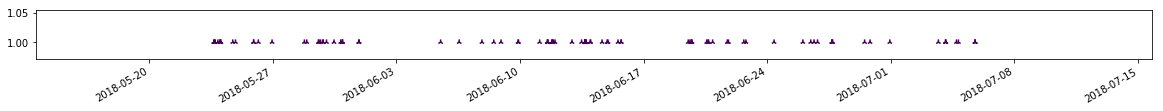

In [99]:
#dates = matplotlib.dates.date2num(df['date'])
#dates = pd.Timestamp(d['date']).to_pydatetime()
#matplotlib.pyplot.plot_date(d['date'], d['auth'])
#range(0,len(d['date']))
import datetime
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for ds in d['date']:
    da += ds
    dates.append(datetime.datetime.fromtimestamp(da))

ax.scatter(dates, [1]*len(dates), c=[0]*len(dates),marker='2', s=30)
fig.autofmt_xdate()


### Importei este pedaco de codigo do ultimo trabalho. Fiz leves modificacoes.

In [ ]:
# modelos de classificação
from sklearn import linear_model,datasets,svm,tree,neural_network
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

#função de utilidade para separar teste e treinamento
from sklearn.model_selection import train_test_split

#funções de utilidade para metricas
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

#funções de utilidade para seleção de features
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2
import matplotlib.pyplot as plt
import seaborn as sns
import math

# isto é para usarmos markdown no meio de uma célula Python
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import random

def present(x,y,h):
    fig = plt.figure(figsize = (15,15))
    size = len(data.columns)
    for i in range(0,size-1):
        ax = fig.add_subplot(math.ceil(math.sqrt(size-1)), math.ceil(math.sqrt(size-1)), i+1)
        ax.scatter(x.iloc[:,i], y,  color='red')
        ax.scatter(x.iloc[:,i], h, color='blue')
    plt.show()
def test(regr,X_train,Y_train,X_test,Y_test):
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    metrics = {
       'mse': mean_squared_error(Y_test, Y_pred),
       'r2':r2_score(Y_test, Y_pred),
       #'accuracy':accuracy_score(Y_test, Y_pred), 
       #'precision':precision_score(Y_test, Y_pred, average='macro'), 
       #'recall':recall_score(Y_test, Y_pred, average='macro'),
       #'f1':f1_score(Y_test, Y_pred, average='macro')
    }
    #metrics={}
    return regr,metrics
methods = [
        linear_model.LinearRegression(),
        svm.SVC(),
        linear_model.SGDClassifier(max_iter=1000,tol=1e-3,loss="huber"),
        #NearestCentroid(),
        KNeighborsClassifier(n_neighbors=5),
        tree.DecisionTreeRegressor(),
        tree.DecisionTreeClassifier(),
        neural_network.MLPClassifier(solver='lbfgs')
    ]
#função que testa todos os métodos, retornando uma lista com as métricas
def test_all(X_train,Y_train,X_test,Y_test):
    metrics = []
    for method in methods:
        #print(method.__class__.__name__)
        #print()
        model,metric = test(method,X_train,Y_train,X_test,Y_test)
        #print()
        metrics = metrics + [metric]
    return metrics

# Perguntas:
## 1) Quando sera o proximo commit? (Ou melhor, quando serao os proximos N?)

In [119]:
# vamos estimar uma funcao indice -> delta_data
X = df['index'].values.reshape(-1, 1)
Y = df['date']
print(np.shape(X),np.shape(Y))
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
#parei de usar o randomstate com valores sequenciais, apresentou melhores resultados
print(np.shape(X_train),np.shape(Y_train))

(100, 1) (100,)
(75, 1) (75,)


In [101]:
metrics = test_all(X_train,Y_train,X_test,Y_test)
metrics

[{'mse': 3092896190.7774715, 'r2': -0.004780883819102133},
 {'mse': 3959322001.64, 'r2': -0.28625431141037727},
 {'mse': 12471975469.92, 'r2': -3.0517371947379424},
 {'mse': 3810070449.6, 'r2': -0.23776736030697587},
 {'mse': 3379306684.28, 'r2': -0.09782629208551907},
 {'mse': 3379306684.28, 'r2': -0.09782629208551907},
 {'mse': 3067961168.16, 'r2': 0.0033196900502505677}]

### Todos os metodos tem muito erro.
#### Vamos ensaiar com modelo linear, arvore de decisao e rede neural.

N=50

### Linear

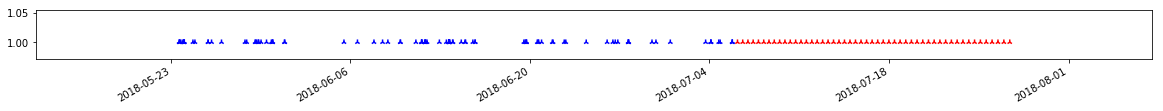

In [105]:
model,metric = test(methods[0],X_train,Y_train,X_test,Y_test)
datesk = model.predict(np.arange(0,N).reshape(-1, 1))
vals = np.append(df['date'].values, datesk)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for d in vals:
    da += d
    dates.append(datetime.datetime.fromtimestamp(da))

ax.scatter(dates, [1]*len(dates), c=['b']*len(df)+['r']*len(datesk),marker='2', s=30)
fig.autofmt_xdate()

### Arvore de decisao

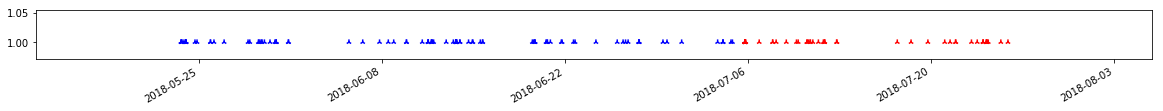

In [120]:
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
datesk = model.predict(np.arange(0,N).reshape(-1, 1))
vals = np.append(df['date'].values, datesk)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for d in vals:
    da += d
    dates.append(datetime.datetime.fromtimestamp(da))

ax.scatter(dates, [1]*len(dates), c=['b']*len(df)+['r']*len(datesk),marker='2', s=30)
fig.autofmt_xdate()
ref_dates = dates

### Rede neural

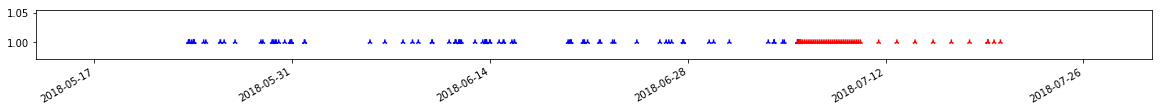

In [107]:
model,metric = test(methods[-1],X_train,Y_train,X_test,Y_test)
datesk = model.predict(np.arange(0,N).reshape(-1, 1))
vals = np.append(df['date'].values, datesk)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for d in vals:
    da += d
    dates.append(datetime.datetime.fromtimestamp(da))

ax.scatter(dates, [1]*len(dates), c=['b']*len(df)+['r']*len(datesk),marker='2', s=30)
fig.autofmt_xdate()

### A rede produz resultados de forma muito inconsistente. As vezes 'e algo distribuido uniformemente, as vezes tudo esta concentrado e as vezes fica bastante 'realista' no sentido de pontos espalhados em intervalos parecidos com a serie ate entao

#### Antes de chegar a estes ultimos resultados testei diversas combinacoes de parametros.
#### Uma tentativa interessante foi que ao tentar prever os indices len(data) ate len(data)+N-1, com N=50, os resultados foram inesperados
#### (Teste com arvore de decisao)

In [102]:
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
datesk = model.predict(np.arange(len(df),len(df)+N-1).reshape(-1, 1))

In [103]:
vals = np.append(df['date'].values, datesk)

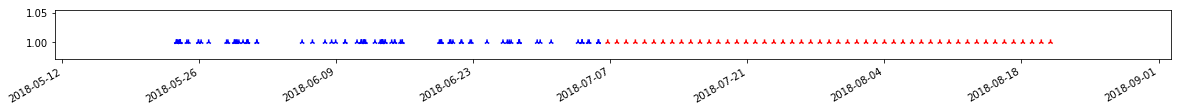

In [104]:
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for d in vals:
    da += d
    dates.append(datetime.datetime.fromtimestamp(da))

ax.scatter(dates, [1]*len(dates), c=['b']*len(df)+['r']*len(datesk),marker='2', s=30)
fig.autofmt_xdate()

#### depois de um tempo deduzi que eh pq nao treinei nestei valores, entao optei por treinar em [0,N)

### A partir de agora meu modelo de escolha eh a arvore de decisao.

#### Para fim de demonstracao, o proximo commit:

In [109]:
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
datesk = model.predict(np.arange(0,1).reshape(-1, 1))
vals = np.append(df['date'].values, datesk)
da = firstdate
for d in vals:
    da += d
datetime.datetime.fromtimestamp(da)

datetime.datetime(2018, 7, 5, 19, 25, 26)

### plot da arvore com os valores de validacao (teste = verde, previsao = vermelho)

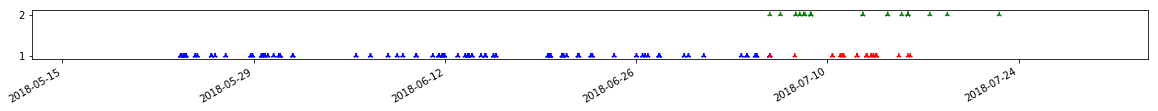

In [123]:
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
datesk = model.predict(X_test)
vals1 = np.append(df['date'].values, datesk)
vals2 = np.append(df['date'].values, Y_test)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates1 = []
for d in vals1:
    da += d
    dates1.append(datetime.datetime.fromtimestamp(da))
da = firstdate
dates2 = []
for d in vals2:
    da += d
    dates2.append(datetime.datetime.fromtimestamp(da))
ax.scatter(dates1, [1]*len(df)+[2]*len(datesk), c=['b']*len(df)+['g']*len(datesk),marker='2', s=30)
ax.scatter(dates2, [1]*len(df)+[1]*len(datesk), c=['b']*len(df)+['r']*len(datesk),marker='2', s=30)
fig.autofmt_xdate()

### 2) Vamos tentar prever autor do proximo commit

In [142]:
X = df['index'].values.reshape(-1, 1)
Y = df['auth']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
Pnames = model.predict(np.arange(0,N).reshape(-1, 1))
[names[v] for v in Pnames]

['Dan Abramov',
 'Dan Abramov',
 'Toru Kobayashi',
 'Toru Kobayashi',
 'Chang Yan',
 'Andrew Clark',
 'Andrew Clark',
 'Andrew Clark',
 'Andrew Clark',
 'Andrew Clark',
 'Andrew Clark',
 'Flarnie Marchan',
 'Brian Vaughn',
 'Brian Vaughn',
 'Sebastian Markbåge',
 'Flarnie Marchan',
 'Daniel Lo Nigro',
 'Simen Bekkhus',
 'Nathan Hunzaker',
 'Dan Abramov',
 'Brian Vaughn',
 'Brian Vaughn',
 'Brian Vaughn',
 'Flarnie Marchan',
 'Spyros Ioakeimidis',
 'Andrew Clark',
 'Flarnie Marchan',
 'Andrew Clark',
 'Flarnie Marchan',
 'Flarnie Marchan',
 'Maxime Nory',
 'Maxime Nory',
 'Maxime Nory',
 'Ivan Babak',
 'Ivan Babak',
 'Ivan Babak',
 'Ivan Babak',
 'Nathan Quarles',
 'Nathan Quarles',
 'Nathan Hunzaker',
 'Eric Soderberg',
 'Nathan Hunzaker',
 'Philipp Spieß',
 'Dan Abramov',
 'Dan Abramov',
 'Brian Vaughn',
 'Brian Vaughn',
 'Flarnie Marchan',
 'Flarnie Marchan',
 'Philipp Spieß']

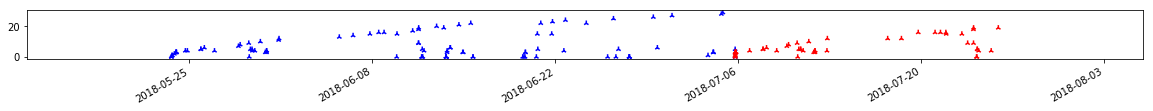

In [143]:
vals = np.append(df['auth'].values, Pnames)
fig, ax = plt.subplots(figsize=(20,1))

ax.scatter(ref_dates, vals, c=['b']*len(df)+['r']*len(Pnames),marker='2', s=30)
fig.autofmt_xdate()

### Testando a hipotese de que precisamos usar indices treinados (em uma situacao nao sequencial)

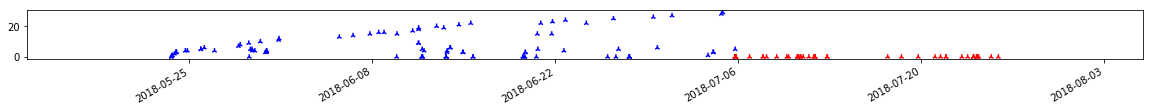

In [144]:
X = df['index'].values.reshape(-1, 1)
Y = df['auth']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)
Pnames = model.predict(np.arange(len(df),len(df)+N).reshape(-1, 1))
vals = np.append(df['auth'].values, Pnames)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate

ax.scatter(ref_dates, vals, c=['b']*len(df)+['r']*len(Pnames),marker='2', s=30)
fig.autofmt_xdate()

### ~~Como mostrado acima, quando tratamos de series nao temporais, podemos (devemos?) prever os proximos indices.~~

### Na verdade, a afirmacao rasurada nao tem um comportamento certo. Dependendo do dado, tem resultados melhores ou piores que estimacao de x conhecidos porem a estimacao de conhecidos apresenta resultados consistentes


### 3) Prevendo extensoes e numero de arquivos modificados no proximo commit

In [151]:
#no preprocessamento, determinei as extensoes possiveis e criei uma coluna com a densidade de cada
exts

['.md', '.js', '.lock', '.json', '.html', '.yml', '.snap']

### Modelo de Arvore de decisao logistica

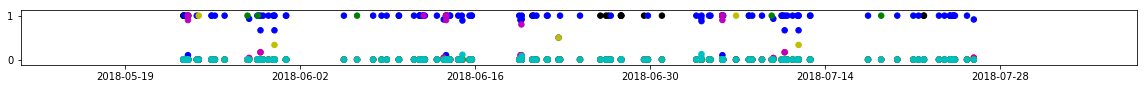

In [156]:
X = df['index'].values.reshape(-1, 1)

Y = df[exts]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[-3],X_train,Y_train,X_test,Y_test)
Pext = model.predict(np.arange(0,N).reshape(-1, 1))
dfext = pd.DataFrame(Pext,columns=exts)
vals = df[exts].append(dfext)

fig, ax = plt.subplots(figsize=(20,1))
colors = ['k','b','r','m','y','g','c']
for e in exts:
    ax.scatter(ref_dates, vals[e], c=[colors[exts.index(e)]]*len(ref_dates),marker='o', s=30)
#fig.autofmt_xdate()

### Modelo de regressao linear logistica

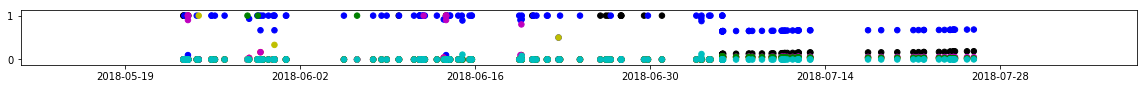

In [157]:
X = df['index'].values.reshape(-1, 1)

Y = df[exts]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[0],X_train,Y_train,X_test,Y_test)
Pext = model.predict(np.arange(0,N).reshape(-1, 1))
dfext = pd.DataFrame(Pext,columns=exts)
vals = df[exts].append(dfext)

fig, ax = plt.subplots(figsize=(20,1))
colors = ['k','b','r','m','y','g','c']
for e in exts:
    ax.scatter(ref_dates, vals[e], c=[colors[exts.index(e)]]*len(ref_dates),marker='o', s=30)
#fig.autofmt_xdate()

### O maior trabalho nesta sessao foi em pre processamento. Depois foi bem direta a regressao. Acredito que devam existir formas muito melhores do que a feita. Fiz uma estimacao com alvo multiclasse simples.

### 4) Vamos tentar prever a mensagem do proximo commit

In [160]:
#X = df['index'].values.reshape(-1, 1)
#Y = df['message']
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
#model,metric = test(methods[0],X_train,Y_train,X_test,Y_test)
#Pmess = model.predict(np.arange(100,150).reshape(-1, 1))
#vals = np.append(df['message'].values, Pmess)
#vals

### Aqui tive bastante dificuldade.

### Como nao queria um resultado super impressionante, tentei converter as mensagens para um outro espaco (numerico), prever la e interpolar de volta.
### Tentei atraves de conversao para base 64 e funcoes de hashing. 
### Sem resultados, tentei tambem usar markov, mas nao me permitia gerar a partir de indices. 
### Tentei tambem usar distancia de string, comecando com a primeira. 
### O problema era na volta, pois determinar uma palavra semelhante com a distancia dada nao me foi trivial (talvez seja mas nao me ocorreu como)

### 5) Testando composicao de predicoes

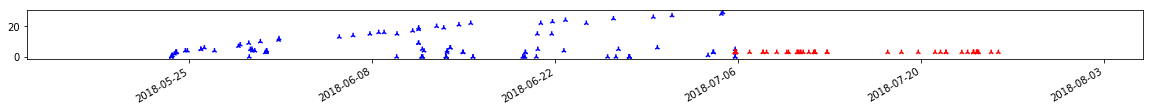

In [218]:
X = df['index'].values.reshape(-1, 1)
Y = df['date']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)

X = df['date'].values.reshape(-1, 1)
Y = df['auth']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model2,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)

Pdates = model.predict(np.arange(0,N).reshape(-1, 1))
Pnames = model2.predict(Pdates.reshape(-1, 1))
vals = np.append(df['auth'].values, Pnames)
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate

ax.scatter(ref_dates, vals, c=['b']*len(df)+['r']*len(Pnames),marker='2', s=30)
fig.autofmt_xdate()

### 6) Testando predicoes para multiclasse (ja tinhamos visto isto nas extensoes)

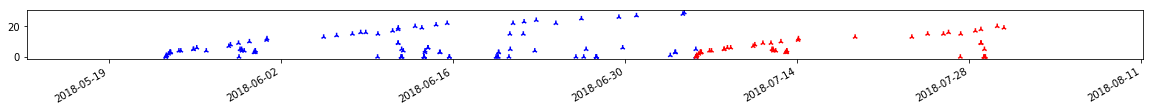

In [217]:
X = df['index'].values.reshape(-1, 1)
Y = df[['date','auth']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[-2],X_train,Y_train,X_test,Y_test)

Pdates = model.predict(np.arange(0,N).reshape(-1, 1))
dts = np.append(df['date'].values, [v[0] for v in Pdates])
vals = np.append(df['auth'].values, [v[1] for v in Pdates])
fig, ax = plt.subplots(figsize=(20,1))
da = firstdate
dates = []
for d in dts:
    da += d
    dates.append(datetime.datetime.fromtimestamp(da))
ax.scatter(dates, vals, c=['b']*len(df)+['r']*len(Pnames),marker='2', s=30)
fig.autofmt_xdate()

### 6) Testando predicoes multiclasse para multiclasse 

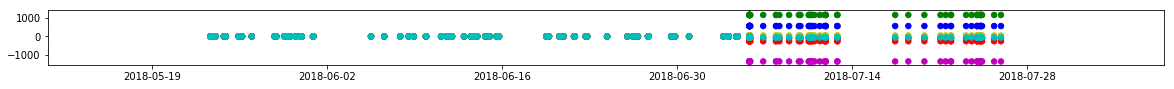

In [212]:
X = df[['index','date']]
Y = df[exts]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=random.randrange(0,100),test_size=0.25)
model,metric = test(methods[0],X_train,Y_train,X_test,Y_test)
inp = np.hstack((
    [[a] for a in np.arange(0,N)],
    [[d.timestamp()] for d in ref_dates[100:]]
))
Pext = model.predict(inp)
dfext = pd.DataFrame(Pext,columns=exts)
vals = df[exts].append(dfext)

fig, ax = plt.subplots(figsize=(20,1))
colors = ['k','b','r','m','y','g','c']
for e in exts:
    ax.scatter(ref_dates, vals[e], c=[colors[exts.index(e)]]*len(ref_dates),marker='o', s=30)
#fig.autofmt_xdate()